# This project analyzes data from smartwatches/fitness trackers to identify differences between subjects | Xiaomi Smart Band 7

#Block 1: Data Loading and Preprocessing

In [ ]:
# This section imports necessary libraries for data analysis and visualization, and mounts Google Drive to access data files.
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Load the dataset from Google Drive
datos = pd.read_csv('/content/drive/MyDrive/prueba.csv', sep=',', header=0)

# Extract unique device IDs to identify the three different wearable devices in the dataset
ids = datos['DEVICE_ID'].unique()
print(ids)

[2 4 3]


In [ ]:
# Group data by device ID to analyze each wearable separately
device_groups = datos.groupby('DEVICE_ID')

# Create a list to store the separated DataFrames
separated_dataframes = []

# Iterate through each device group and create individual dataframes
for device_id_value, group in device_groups:
    separated_dataframes.append(group.copy())

# Store each device's data in separate dataframes for individual analysis
df2 = separated_dataframes[0]
df3 = separated_dataframes[1]
df4 = separated_dataframes[2]

In [ ]:
# Sort dataframes by timestamp to ensure chronological order
df2 = df2.sort_values(by='TIMESTAMP')
df3 = df3.sort_values(by='TIMESTAMP')
df4 = df4.sort_values(by='TIMESTAMP')

# Convert timestamp values to datetime format for better time-based analysis
df2['TIMESTAMP'] = pd.to_datetime(df2['TIMESTAMP'], unit='s')
df3['TIMESTAMP'] = pd.to_datetime(df3['TIMESTAMP'], unit='s')
df4['TIMESTAMP'] = pd.to_datetime(df4['TIMESTAMP'], unit='s')

# Filter out physiologically impossible heart rate values (>220 bpm)
# These represent erroneous readings from the wearable devices
df2 = df2[df2['HEART_RATE'] < 220]
df3 = df3[df3['HEART_RATE'] < 220]
df4 = df4[df4['HEART_RATE'] < 220]

# Select only the columns of interest for subsequent analysis
columns_of_interest = ['TIMESTAMP','RAW_INTENSITY', 'STEPS','RAW_KIND', 'HEART_RATE', 'SLEEP', 'DEEP_SLEEP', 'REM_SLEEP']
df2 = df2[columns_of_interest]
df3 = df3[columns_of_interest]
df4 = df4[columns_of_interest]

#Analysis


## Heart Rate Analysis

In this section, we analyze only the heart rate data from the complete dataset, examining all measurements from the first day of data capture with the wearable devices until the last day of use.

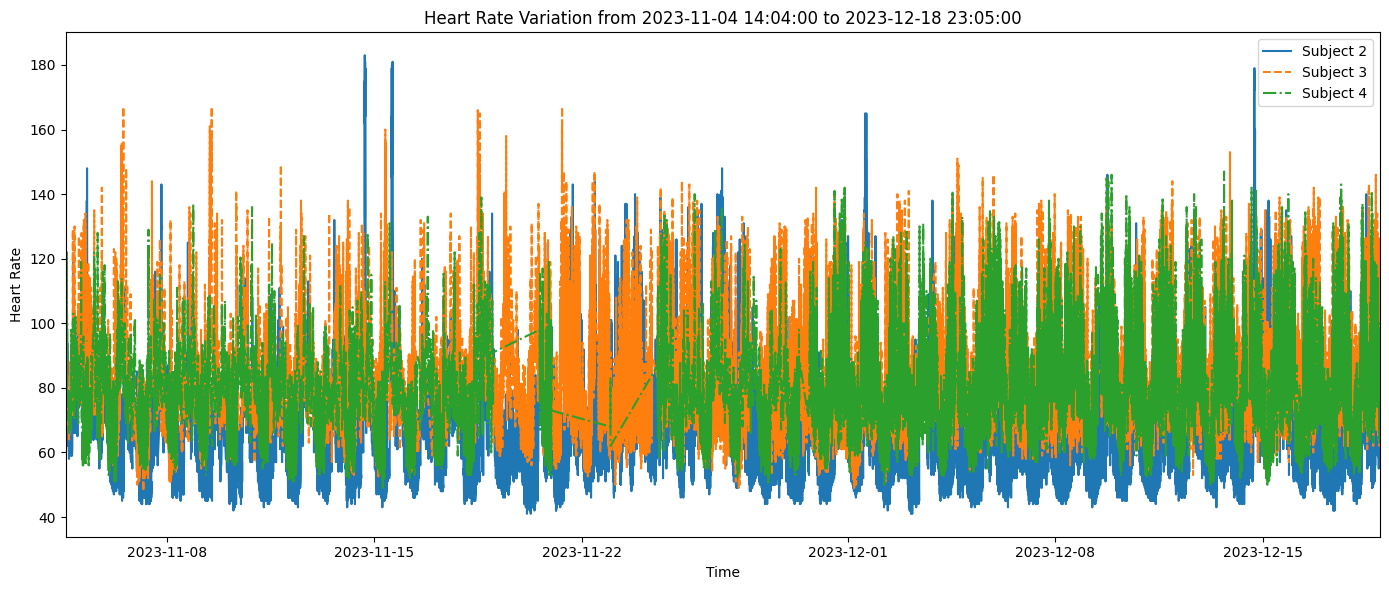

In [ ]:
# Plot 'HEART_RATE' as a function of 'TIMESTAMP' for all subjects
plt.figure(figsize=(14, 6))
plt.plot(df2['TIMESTAMP'], df2['HEART_RATE'], label='Subject 2', linestyle='-')
plt.plot(df3['TIMESTAMP'], df3['HEART_RATE'], label='Subject 3', linestyle='--')
plt.plot(df4['TIMESTAMP'], df4['HEART_RATE'], label='Subject 4', linestyle='-.')
plt.title('Heart Rate Variation from 2023-11-04 14:04:00 to 2023-12-18 23:05:00')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.tight_layout()
plt.legend()
# Set x-axis limits to match the timeframe of subject 3's data
plt.xlim(df3['TIMESTAMP'].min(), df3['TIMESTAMP'].max())

# Display the graph
plt.show()


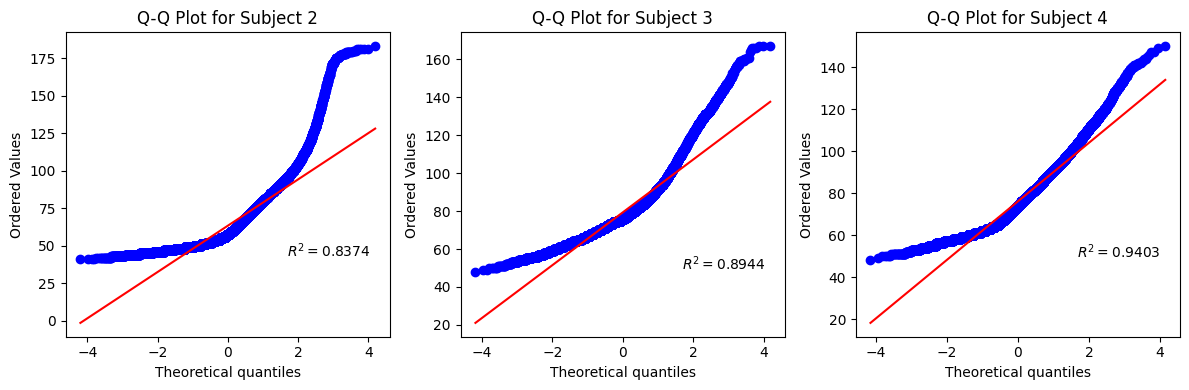

In [ ]:
# Extract heart rate data for each subject
heart_df2 = df2['HEART_RATE'].copy()
heart_df3 = df3['HEART_RATE'].copy()
heart_df4 = df4['HEART_RATE'].copy()

# Q-Q Plots
# We use Q-Q plots to assess if data follows a normal distribution
# Points following the reference line indicate normally distributed data (high R^2)
# Deviations from the line suggest departures from normality (low R^2)
plt.figure(figsize=(12, 4))

plt.subplot(131)
probplot(heart_df2, plot=plt, rvalue=True)
plt.title('Q-Q Plot for Subject 2')

plt.subplot(132)
probplot(heart_df3, plot=plt, rvalue=True)
plt.title('Q-Q Plot for Subject 3')

plt.subplot(133)
probplot(heart_df4, plot=plt, rvalue=True)
plt.title('Q-Q Plot for Subject 4')

plt.tight_layout()
plt.show()


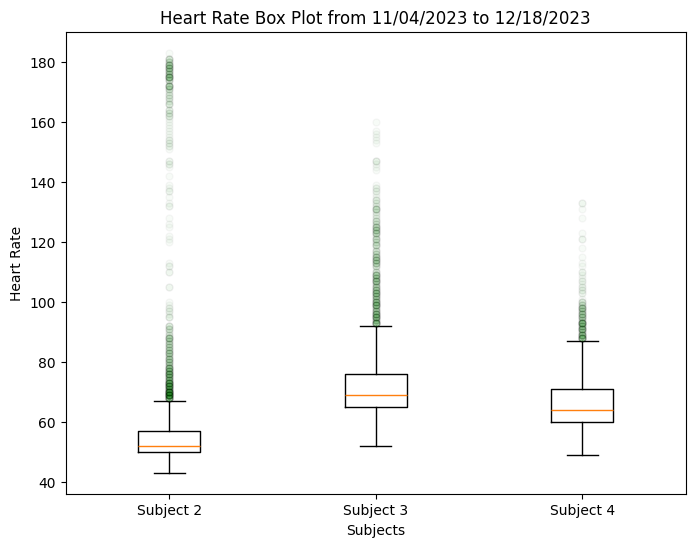

In [ ]:
# Combine heart rate data for all subjects
data = [heart_df2, heart_df3, heart_df4]

# Define style properties for outlier points
# Using green markers with low opacity to better visualize frequency of outliers
flierprops = dict(marker='o', markerfacecolor='green', markersize=5, linestyle='', alpha=0.03)

# Create a boxplot with subtle outlier representation (intensity indicates frequency)
plt.figure(figsize=(8, 6))
plt.boxplot(data, tick_labels=['Subject 2', 'Subject 3', 'Subject 4'], flierprops=flierprops)
plt.title('Heart Rate Box Plot from 11/04/2023 to 12/18/2023')
plt.xlabel('Subjects')
plt.ylabel('Heart Rate')
plt.show()


##Heart Rate Analysis Conclusions

The analysis of heart rate data reveals distinct patterns among the three subjects, which align with their different lifestyle and physical activity levels:

**Subject 2:** High-Intensity Athlete

Subject 2 demonstrates the greatest variation in heart rate, exhibiting both the lowest and highest peaks. This significant range reflects their athletic lifestyle, where intense training sessions drive heart rate to elevated levels during exercise, while efficient cardiovascular fitness allows for lower resting heart rates during recovery periods. The pronounced variability in their heart rate data clearly indicates the intensity of their athletic performance.

**Subject 3:** Moderate Exerciser

Subject 3 shows a more moderate heart rate pattern consistent with someone who visits the gym sporadically and engages in moderate exercise. Their heart rate distribution lacks the extreme highs and lows seen in Subject 2, suggesting less intense cardiovascular demands.

**Subject 4:** Predominantly Sedentary

Subject 4 displays the least variation in heart rate, with a distribution pattern typical of a predominantly sedentary lifestyle with occasional walking activity. Their heart rate remains within a narrower range, without the significant peaks that would indicate vigorous physical exertion.

To sum up, these distinct patterns are clearly visualized in the Q-Q plots, where the R² values quantify the deviation from normal distribution for each subject. The box plot further illustrates these differences, with Subject 2 showing the widest interquartile range and more outliers, Subject 3 displaying moderate variation, and Subject 4 exhibiting the most compact distribution, confirming the lifestyle differences between the three individuals.

## Heart Rate | Work Week VS Holiday Week


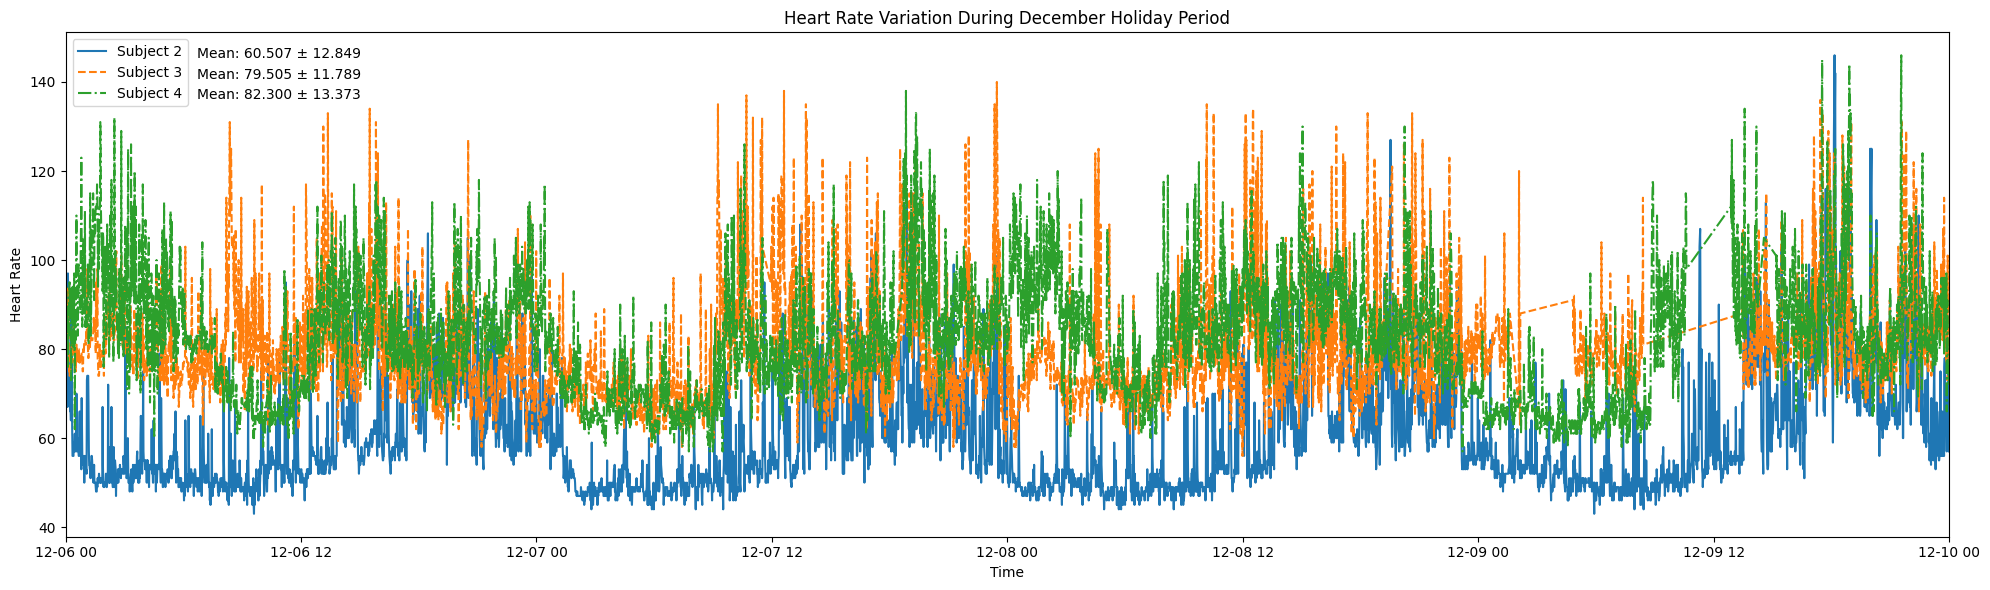

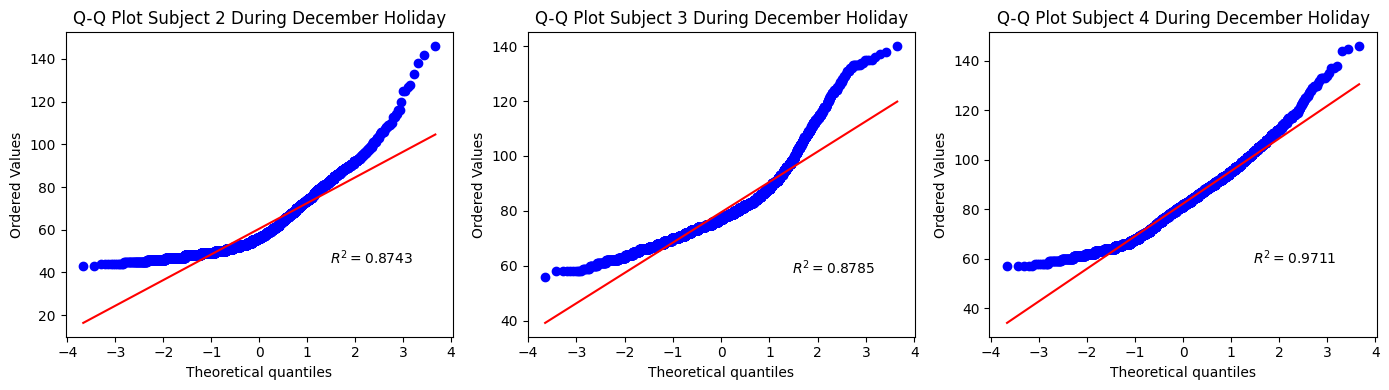

In [ ]:
# Define the date range for the holiday period
start_date = pd.to_datetime('2023-12-06')  # Define start date
end_date = pd.to_datetime('2023-12-10')     # Define end date

# Filter data for each subject during the holiday period
holiday2 = df2[(df2['TIMESTAMP'] >= start_date) & (df2['TIMESTAMP'] <= end_date)]
holiday3 = df3[(df3['TIMESTAMP'] >= start_date) & (df3['TIMESTAMP'] <= end_date)]
holiday4 = df4[(df4['TIMESTAMP'] >= start_date) & (df4['TIMESTAMP'] <= end_date)]

# Extract heart rate data for the holiday period
heart_df2 = holiday2['HEART_RATE'].copy()
heart_df3 = holiday3['HEART_RATE'].copy()
heart_df4 = holiday4['HEART_RATE'].copy()

# Calculate mean and standard deviation for each subject
mean2 = heart_df2.mean()
std2 = heart_df2.std()
mean3 = heart_df3.mean()
std3 = heart_df3.std()
mean4 = heart_df4.mean()
std4 = heart_df4.std()

# Create strings for the legend with mean and standard deviation
Mean_std2 = f'Mean: {mean2:.3f} ± {std2:.3f}'
Mean_std3 = f'Mean: {mean3:.3f} ± {std3:.3f}'
Mean_std4 = f'Mean: {mean4:.3f} ± {std4:.3f}'

# Plot heart rate data during the December holiday period
plt.figure(figsize=(20, 6))
plt.plot(holiday2['TIMESTAMP'], holiday2['HEART_RATE'], label='Subject 2', linestyle='-')
plt.plot(holiday3['TIMESTAMP'], holiday3['HEART_RATE'], label='Subject 3', linestyle='--')
plt.plot(holiday4['TIMESTAMP'], holiday4['HEART_RATE'], label='Subject 4', linestyle='-.')
plt.title('Heart Rate Variation During December Holiday Period')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.legend()
plt.text(0.07, 0.97, Mean_std2, ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0.07, 0.93, Mean_std3, ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0.07, 0.89, Mean_std4, ha='left', va='top', transform=plt.gca().transAxes)
plt.xlim(holiday2['TIMESTAMP'].min(), holiday2['TIMESTAMP'].max())
plt.tight_layout()
plt.show()

# Q-Q Plots for the holiday period data
plt.figure(figsize=(14, 4))

plt.subplot(131)
probplot(heart_df2, plot=plt, rvalue=True)
plt.title('Q-Q Plot Subject 2 During December Holiday')

plt.subplot(132)
probplot(heart_df3, plot=plt, rvalue=True)
plt.title('Q-Q Plot Subject 3 During December Holiday')

plt.subplot(133)
probplot(heart_df4, plot=plt, rvalue=True)
plt.title('Q-Q Plot Subject 4 During December Holiday')

plt.tight_layout()
plt.show()


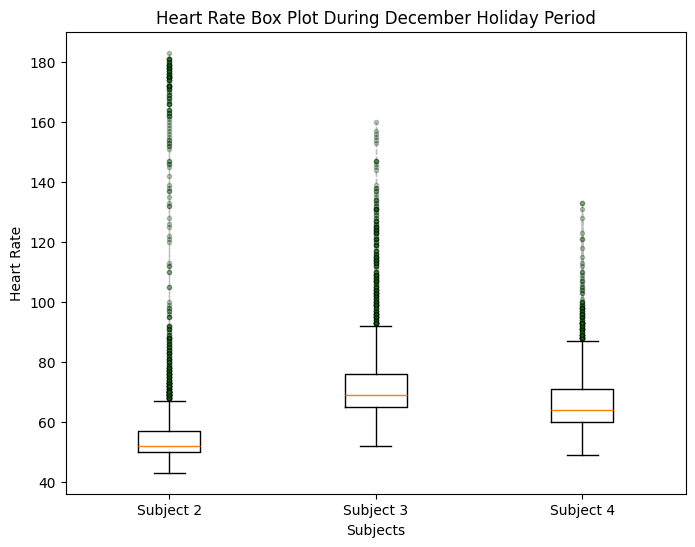

In [ ]:
# Combine heart rate data for all subjects during the holiday period
holiday_data = [heart_df2, heart_df3, heart_df4]

# Define style properties for outlier points
flierprops = dict(marker='o', markerfacecolor='green', markersize=3, linestyle='dashed', alpha=0.25)

# Create a boxplot to compare heart rates during the holiday period
plt.figure(figsize=(8, 6))
plt.boxplot(holiday_data, tick_labels=['Subject 2', 'Subject 3', 'Subject 4'], flierprops=flierprops)
plt.title('Heart Rate Box Plot During December Holiday Period')
plt.xlabel('Subjects')
plt.ylabel('Heart Rate')
plt.show()

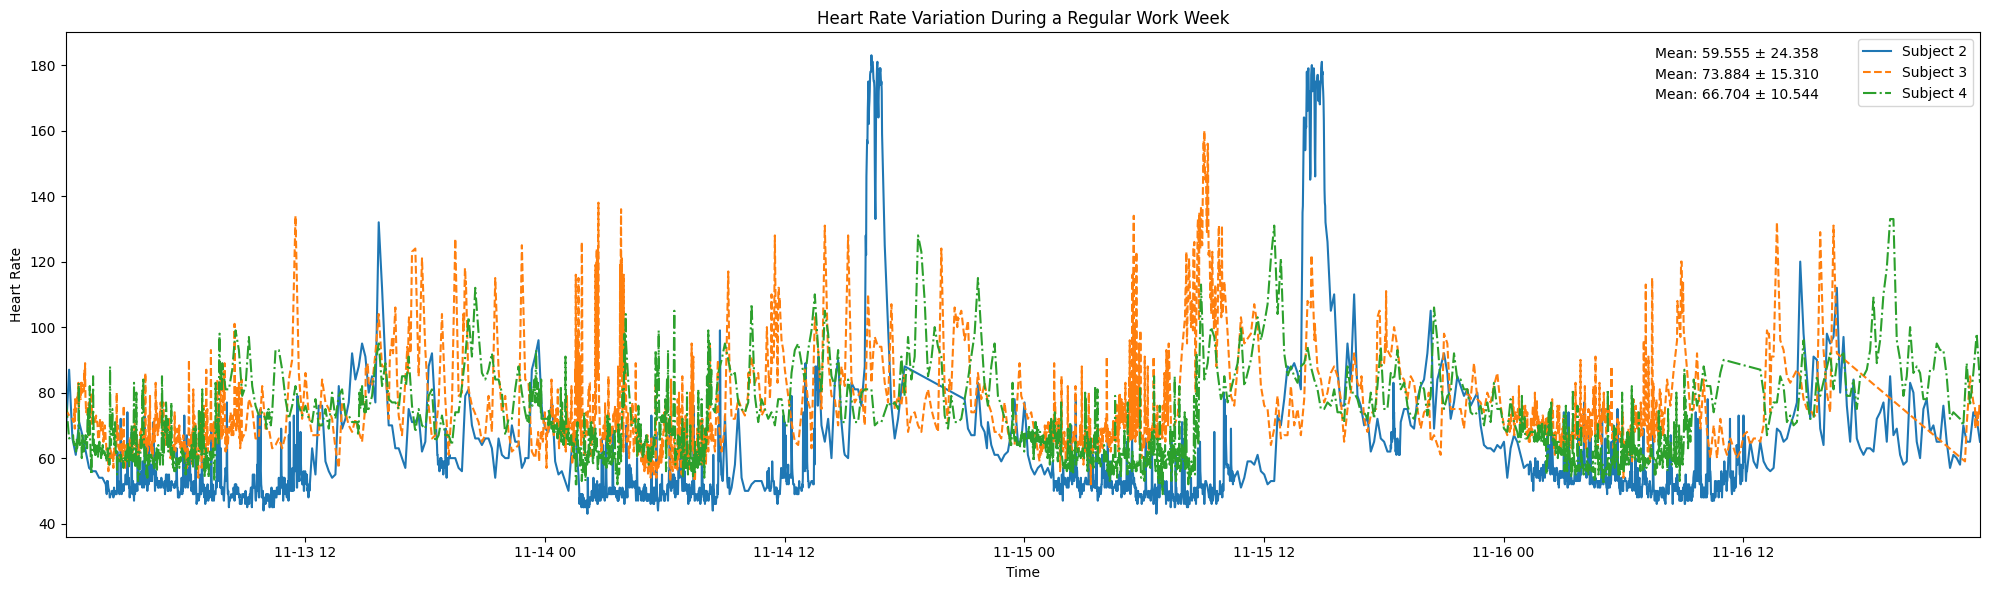

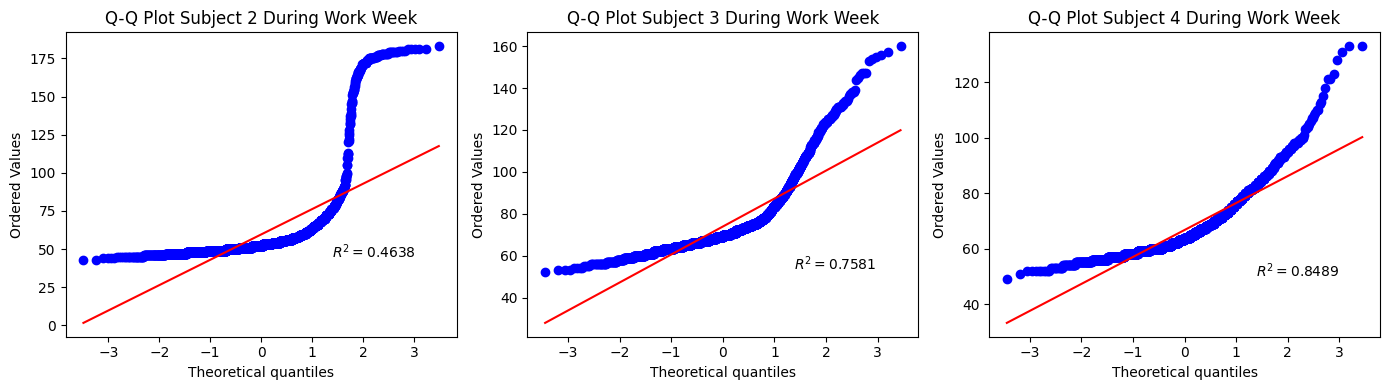

In [ ]:
# Define the date range for a regular work week
start_date = pd.to_datetime('2023-11-13')
end_date = pd.to_datetime('2023-11-17')

# Filter data for each subject during the work week
workweek2 = df2[(df2['TIMESTAMP'] >= start_date) & (df2['TIMESTAMP'] <= end_date)]
workweek3 = df3[(df3['TIMESTAMP'] >= start_date) & (df3['TIMESTAMP'] <= end_date)]
workweek4 = df4[(df4['TIMESTAMP'] >= start_date) & (df4['TIMESTAMP'] <= end_date)]

# Extract heart rate data for the work week
heart_df2 = workweek2['HEART_RATE'].copy()
heart_df3 = workweek3['HEART_RATE'].copy()
heart_df4 = workweek4['HEART_RATE'].copy()

# Calculate mean and standard deviation for each subject
mean2 = heart_df2.mean()
std2 = heart_df2.std()
mean3 = heart_df3.mean()
std3 = heart_df3.std()
mean4 = heart_df4.mean()
std4 = heart_df4.std()

# Create strings for the legend with mean and standard deviation
Mean_std2 = f'Mean: {mean2:.3f} ± {std2:.3f}'
Mean_std3 = f'Mean: {mean3:.3f} ± {std3:.3f}'
Mean_std4 = f'Mean: {mean4:.3f} ± {std4:.3f}'

# Plot heart rate data during the work week
plt.figure(figsize=(20, 6))
plt.plot(workweek2['TIMESTAMP'], workweek2['HEART_RATE'], label='Subject 2', linestyle='-')
plt.plot(workweek3['TIMESTAMP'], workweek3['HEART_RATE'], label='Subject 3', linestyle='--')
plt.plot(workweek4['TIMESTAMP'], workweek4['HEART_RATE'], label='Subject 4', linestyle='-.')
plt.title('Heart Rate Variation During a Regular Work Week')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.legend()
plt.text(0.83, 0.97, Mean_std2, ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0.83, 0.93, Mean_std3, ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0.83, 0.89, Mean_std4, ha='left', va='top', transform=plt.gca().transAxes)
plt.xlim(workweek2['TIMESTAMP'].min(), workweek2['TIMESTAMP'].max())
plt.tight_layout()
plt.show()

# Q-Q Plots for the work week data
plt.figure(figsize=(14, 4))

plt.subplot(131)
probplot(heart_df2, plot=plt, rvalue=True)
plt.title('Q-Q Plot Subject 2 During Work Week')

plt.subplot(132)
probplot(heart_df3, plot=plt, rvalue=True)
plt.title('Q-Q Plot Subject 3 During Work Week')

plt.subplot(133)
probplot(heart_df4, plot=plt, rvalue=True)
plt.title('Q-Q Plot Subject 4 During Work Week')

plt.tight_layout()
plt.show()


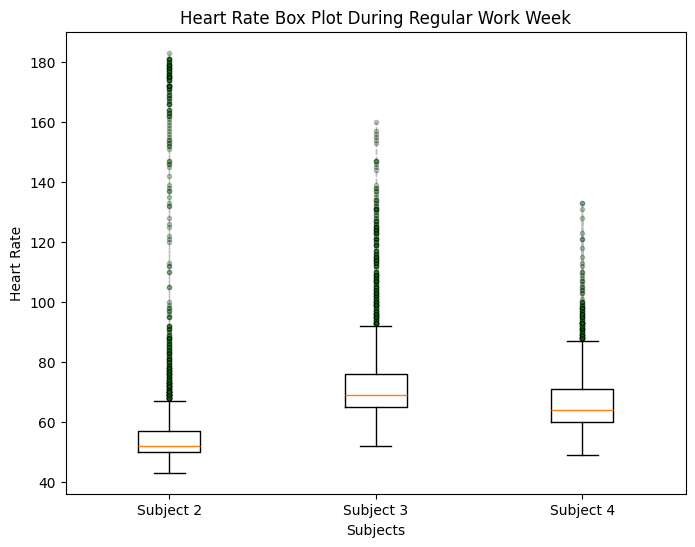

In [ ]:
# Combine heart rate data for all subjects during the work week
workweek_data = [heart_df2, heart_df3, heart_df4]

# Define style properties for outlier points
flierprops = dict(marker='o', markerfacecolor='green', markersize=3, linestyle='dashed', alpha=0.25)

# Create a boxplot to compare heart rates during the work week
plt.figure(figsize=(8, 6))
plt.boxplot(workweek_data, tick_labels=['Subject 2', 'Subject 3', 'Subject 4'], flierprops=flierprops)
plt.title('Heart Rate Box Plot During Regular Work Week')
plt.xlabel('Subjects')
plt.ylabel('Heart Rate')
plt.show()

##Heart Reat Analysys Work Week vs Holiday Week Conclusion

**Subject 2**

Subject 2 shows markedly different heart rate patterns between periods. During holidays, their heart rate remains consistently lower with a more normal distribution, suggesting a period of rest with no intense physical activity. In contrast, during the work week, their heart rate shows significant variability with clear exercise-induced peaks on two days, creating a non-normal distribution pattern typical of high-intensity training.

**Subject 3**

Subject 3 displays more consistent heart rate patterns across both periods, though with noticeable differences. Their holiday period shows a more regular distribution compared to the work week, indicating a more relaxed routine without the influence of occasional gym visits and work-related stressors that characterize their normal week.

**Subject 4**

Subject 4 maintains the most consistent heart rate patterns across both periods. Their holiday data shows an almost perfect normal distribution, while the work week shows only slight deviations from this pattern. This consistency aligns with their predominantly sedentary lifestyle, with minimal physical exertion during either period.

The data clearly shows that lifestyle differences between subjects are magnified or diminished depending on the period analyzed.

These findings highlight how wearable device data can effectively capture not just overall lifestyle differences between individuals, but also how those patterns change during different types of weeks (holiday vs. work), providing valuable insights into activity patterns and cardiovascular responses.

##Deep Sleep Work | Work Week vs Holiday Week

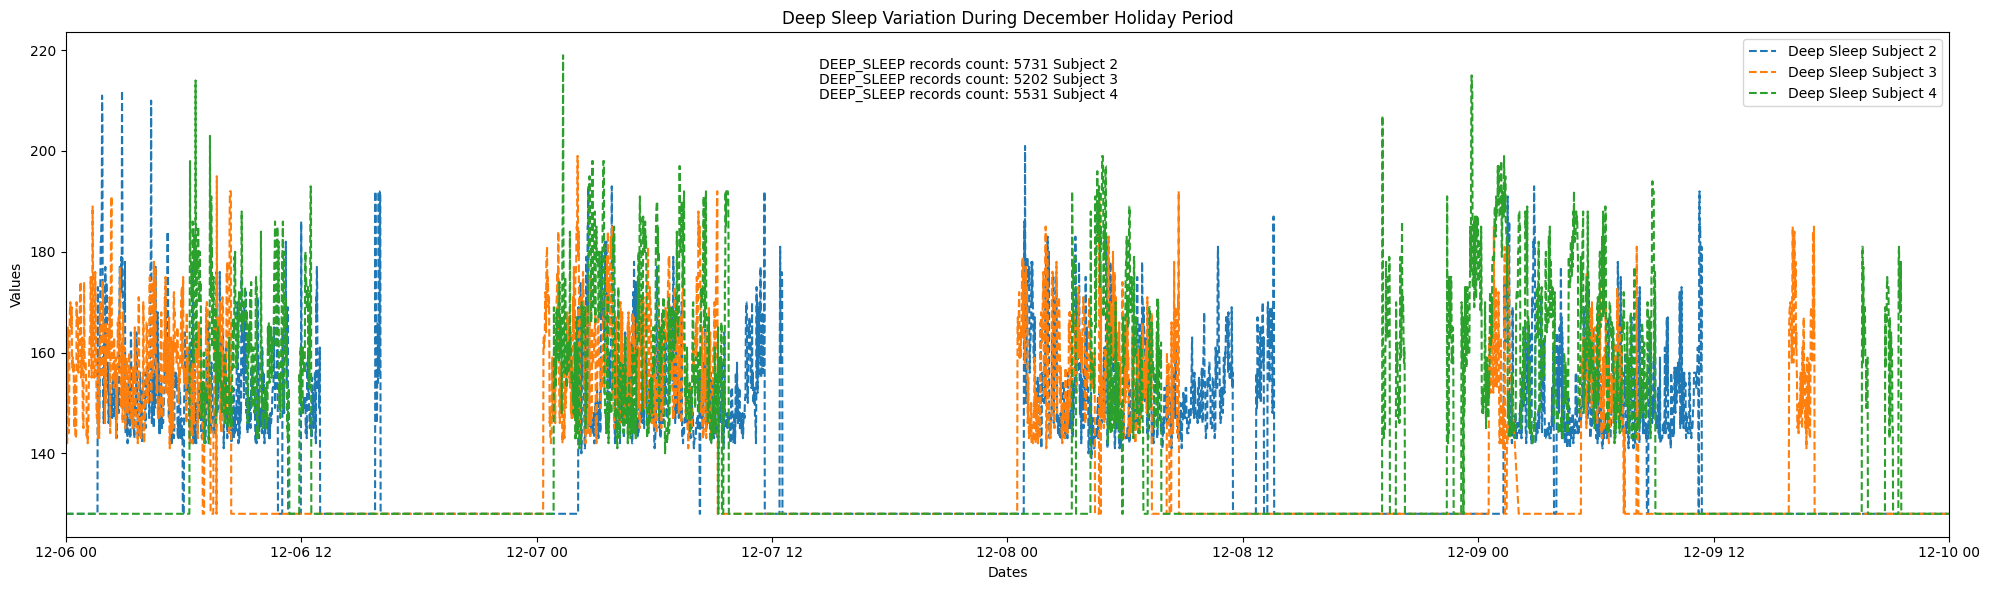

In [ ]:
# Date selection --> HOLIDAY WEEK
start_date = pd.to_datetime('2023-12-06')
end_date = pd.to_datetime('2023-12-10')

holiday2 = df2[(df2['TIMESTAMP'] >= start_date) & (df2['TIMESTAMP'] <= end_date)]
holiday3 = df3[(df3['TIMESTAMP'] >= start_date) & (df3['TIMESTAMP'] <= end_date)]
holiday4 = df4[(df4['TIMESTAMP'] >= start_date) & (df4['TIMESTAMP'] <= end_date)]

# Count of times a DEEP_SLEEP value is recorded. Since we don't know what the Deep_Sleep values mean,
# because its encripted.
# I've chosen to count the times the wearable records a value different from 0.
# Which means that the subject is in Deep Sleep phase. The values doesnt give us information.
#This allows for more meaningful quantification than simply summing the values.

count_holiday2 = holiday2['DEEP_SLEEP'] > 0
counth2 = count_holiday2.count()
count_holiday2 = f"DEEP_SLEEP records count: {counth2} Subject 2"
count_holiday3 = holiday3['DEEP_SLEEP'] > 0
counth3 = count_holiday3.count()
count_holiday3 = f"DEEP_SLEEP records count: {counth3} Subject 3"
count_holiday4 = holiday4['DEEP_SLEEP'] > 0
counth4 = count_holiday4.count()
count_holiday4 = f"DEEP_SLEEP records count: {counth4} Subject 4"

# Graph of DEEP_SLEEP for the December holiday period
plt.figure(figsize=(20, 6))
plt.plot(holiday2['TIMESTAMP'], holiday2['DEEP_SLEEP'], label='Deep Sleep Subject 2', linestyle='--')
plt.plot(holiday3['TIMESTAMP'], holiday3['DEEP_SLEEP'], label='Deep Sleep Subject 3', linestyle='--')
plt.plot(holiday4['TIMESTAMP'], holiday4['DEEP_SLEEP'], label='Deep Sleep Subject 4', linestyle='--')
plt.title('Deep Sleep Variation During December Holiday Period')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.legend()
plt.text(0.4, 0.95, count_holiday2, ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0.4, 0.92, count_holiday3, ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0.4, 0.89, count_holiday4, ha='left', va='top', transform=plt.gca().transAxes)
plt.xlim(holiday2['TIMESTAMP'].min(), holiday2['TIMESTAMP'].max())
plt.tight_layout()
plt.show()


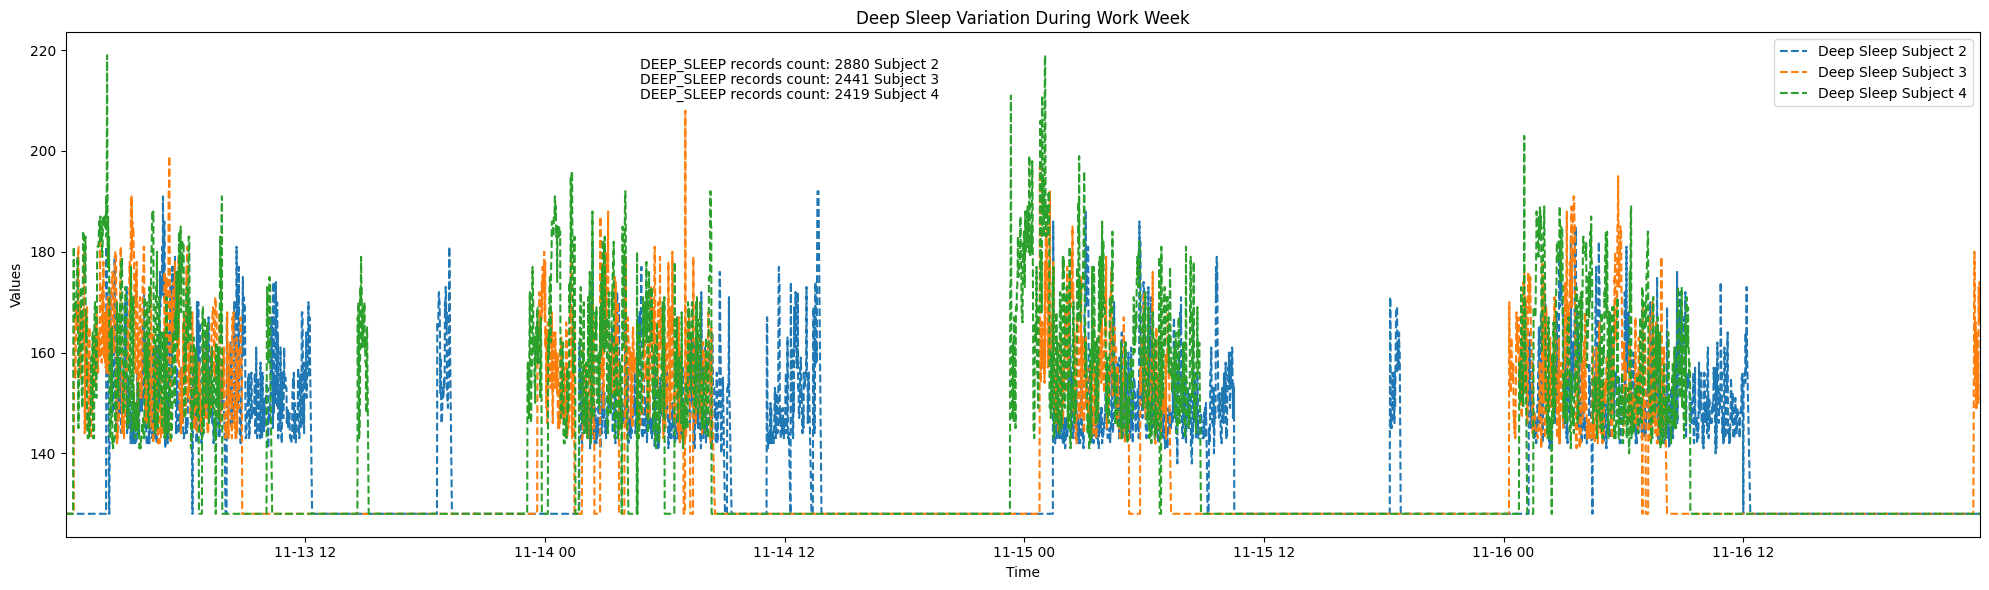

In [ ]:
# Date selection --> WORK WEEK
start_date = pd.to_datetime('2023-11-13')
end_date = pd.to_datetime('2023-11-17')

workweek2 = df2[(df2['TIMESTAMP'] >= start_date) & (df2['TIMESTAMP'] <= end_date)]
workweek3 = df3[(df3['TIMESTAMP'] >= start_date) & (df3['TIMESTAMP'] <= end_date)]
workweek4 = df4[(df4['TIMESTAMP'] >= start_date) & (df4['TIMESTAMP'] <= end_date)]

# Count of times a DEEP_SLEEP value is recorded
count_workweek2 = workweek2['DEEP_SLEEP'] > 0
countw2 = count_workweek2.count()
count_workweek2 = f"DEEP_SLEEP records count: {countw2} Subject 2"
count_workweek3 = workweek3['DEEP_SLEEP'] > 0
countw3 = count_workweek3.count()
count_workweek3 = f"DEEP_SLEEP records count: {countw3} Subject 3"
count_workweek4 = workweek4['DEEP_SLEEP'] > 0
countw4 = count_workweek4.count()
count_workweek4 = f"DEEP_SLEEP records count: {countw4} Subject 4"

# Graph of DEEP_SLEEP
plt.figure(figsize=(20, 6))
plt.plot(workweek2['TIMESTAMP'], workweek2['DEEP_SLEEP'], label='Deep Sleep Subject 2', linestyle='--')
plt.plot(workweek3['TIMESTAMP'], workweek3['DEEP_SLEEP'], label='Deep Sleep Subject 3', linestyle='--')
plt.plot(workweek4['TIMESTAMP'], workweek4['DEEP_SLEEP'], label='Deep Sleep Subject 4', linestyle='--')
plt.title('Deep Sleep Variation During Work Week')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.text(0.3, 0.95, count_workweek2, ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0.3, 0.92, count_workweek3, ha='left', va='top', transform=plt.gca().transAxes)
plt.text(0.3, 0.89, count_workweek4, ha='left', va='top', transform=plt.gca().transAxes)
plt.xlim(workweek2['TIMESTAMP'].min(), workweek2['TIMESTAMP'].max())
plt.tight_layout()
plt.show()


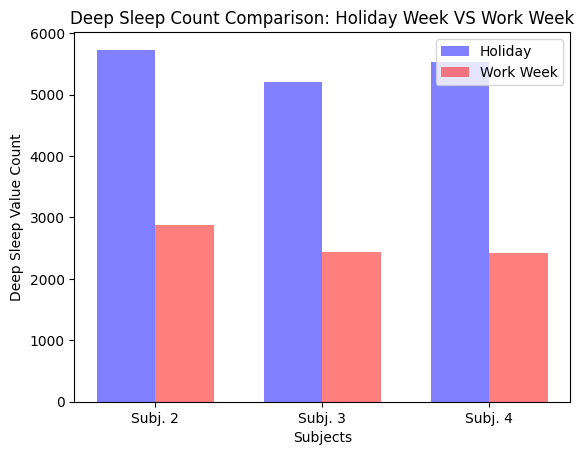

In [ ]:
# Create separate lists for each category: holiday and work week
holiday_values = [counth2, counth3, counth4]
workweek_values = [countw2, countw3, countw4]
bar_width = 0.35

# Create a bar plot comparing deep sleep counts between holiday and work week
plt.bar([1, 2, 3], holiday_values, bar_width, alpha=0.5, label='Holiday', color='blue')
plt.bar([1 + bar_width, 2 + bar_width, 3 + bar_width], workweek_values, bar_width, alpha=0.5, label='Work Week', color='red')
plt.xlabel('Subjects')
plt.ylabel('Deep Sleep Value Count')
plt.title('Deep Sleep Count Comparison: Holiday Week VS Work Week')
plt.legend()
plt.xticks([1 + bar_width / 2, 2 + bar_width / 2, 3 + bar_width / 2], ['Subj. 2', 'Subj. 3', 'Subj. 4'])
plt.show()


##Deep Sleep Analysys Work Week vs Holiday Week Conclusion

The comparison between holiday and work week deep sleep patterns reveals striking differences across all subjects. The holiday period consistently shows higher deep sleep counts, suggesting more relaxed and potentially higher quality rest periods.

The temporal data clearly displays afternoon nap patterns during holidays and distinct differences in nighttime sleep routines between the two periods. These variations are immediately visible in the graphs and quantitatively confirmed in the comparative bar chart.

These findings have practical clinical value, as doctors could use such data to better understand a patient's sleep health across different contexts. The clear visualization of how work schedules impact deep sleep could help identify stress-related sleep issues and inform personalized recommendations.

This analysis demonstrates how wearable devices can effectively capture contextual sleep pattern differences, providing valuable insights into this critical health indicator without invasive monitoring.

## Steps VS Heart Rate

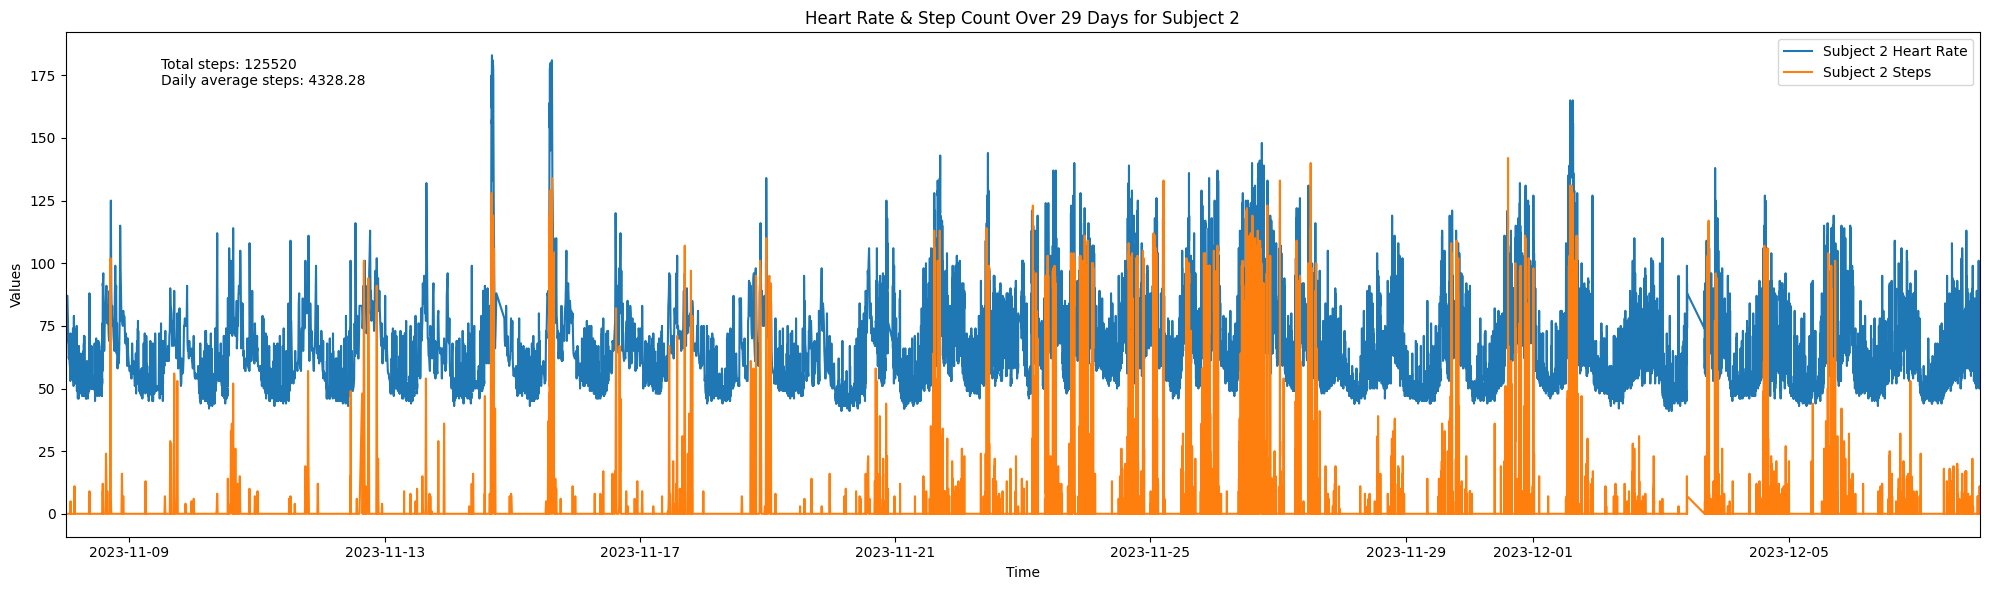

In [ ]:
# Date selection
start_date = pd.to_datetime('2023-11-08')
end_date = pd.to_datetime('2023-12-08')

month2 = df2[(df2['TIMESTAMP'] >= start_date) & (df2['TIMESTAMP'] <= end_date)]
heart_df2 = month2['HEART_RATE'].copy()
steps2 = month2['STEPS'].copy()

total_steps = steps2.sum()
days = month2['TIMESTAMP'].max() - month2['TIMESTAMP'].min()
days = np.int64(days.days)
daily_steps = round(total_steps/days, 2)

# Graph
plt.figure(figsize=(20, 6))
plt.plot(month2['TIMESTAMP'], heart_df2, label='Subject 2 Heart Rate', linestyle='-')
plt.plot(month2['TIMESTAMP'], steps2, label='Subject 2 Steps', linestyle='-')
plt.title(f'Heart Rate & Step Count Over {days} Days for Subject 2')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.text(0.05, 0.95, f"Total steps: {total_steps}\nDaily average steps: {daily_steps}", ha='left', va='top', transform=plt.gca().transAxes)
plt.xlim(month2['TIMESTAMP'].min(), month2['TIMESTAMP'].max())
plt.tight_layout()
plt.show()


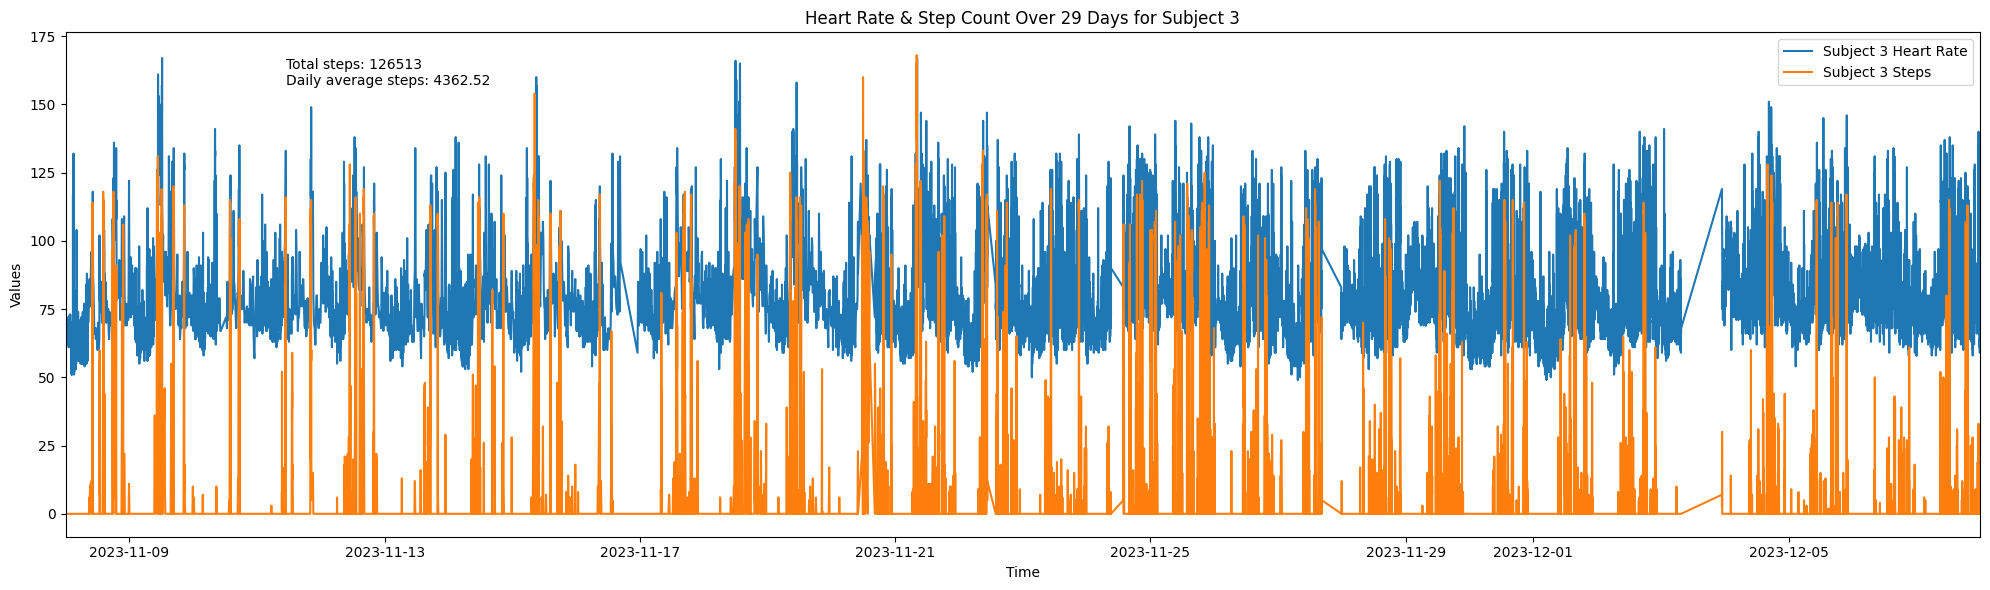

In [ ]:
# Date selection
start_date = pd.to_datetime('2023-11-08')
end_date = pd.to_datetime('2023-12-08')

month3 = df3[(df3['TIMESTAMP'] >= start_date) & (df3['TIMESTAMP'] <= end_date)]
heart_df3 = month3['HEART_RATE'].copy()
steps3 = month3['STEPS'].copy()

total_steps = steps3.sum()
days = month3['TIMESTAMP'].max() - month3['TIMESTAMP'].min()
days = np.int64(days.days)
daily_steps = round(total_steps/days, 2)

# Graph
plt.figure(figsize=(20, 6))
plt.plot(month3['TIMESTAMP'], heart_df3, label='Subject 3 Heart Rate', linestyle='-')
plt.plot(month3['TIMESTAMP'], steps3, label='Subject 3 Steps', linestyle='-')
plt.title(f'Heart Rate & Step Count Over {days} Days for Subject 3')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.text(0.115, 0.95, f"Total steps: {total_steps}\nDaily average steps: {daily_steps}", ha='left', va='top', transform=plt.gca().transAxes)
plt.xlim(month3['TIMESTAMP'].min(), month3['TIMESTAMP'].max())
plt.tight_layout()
plt.show()


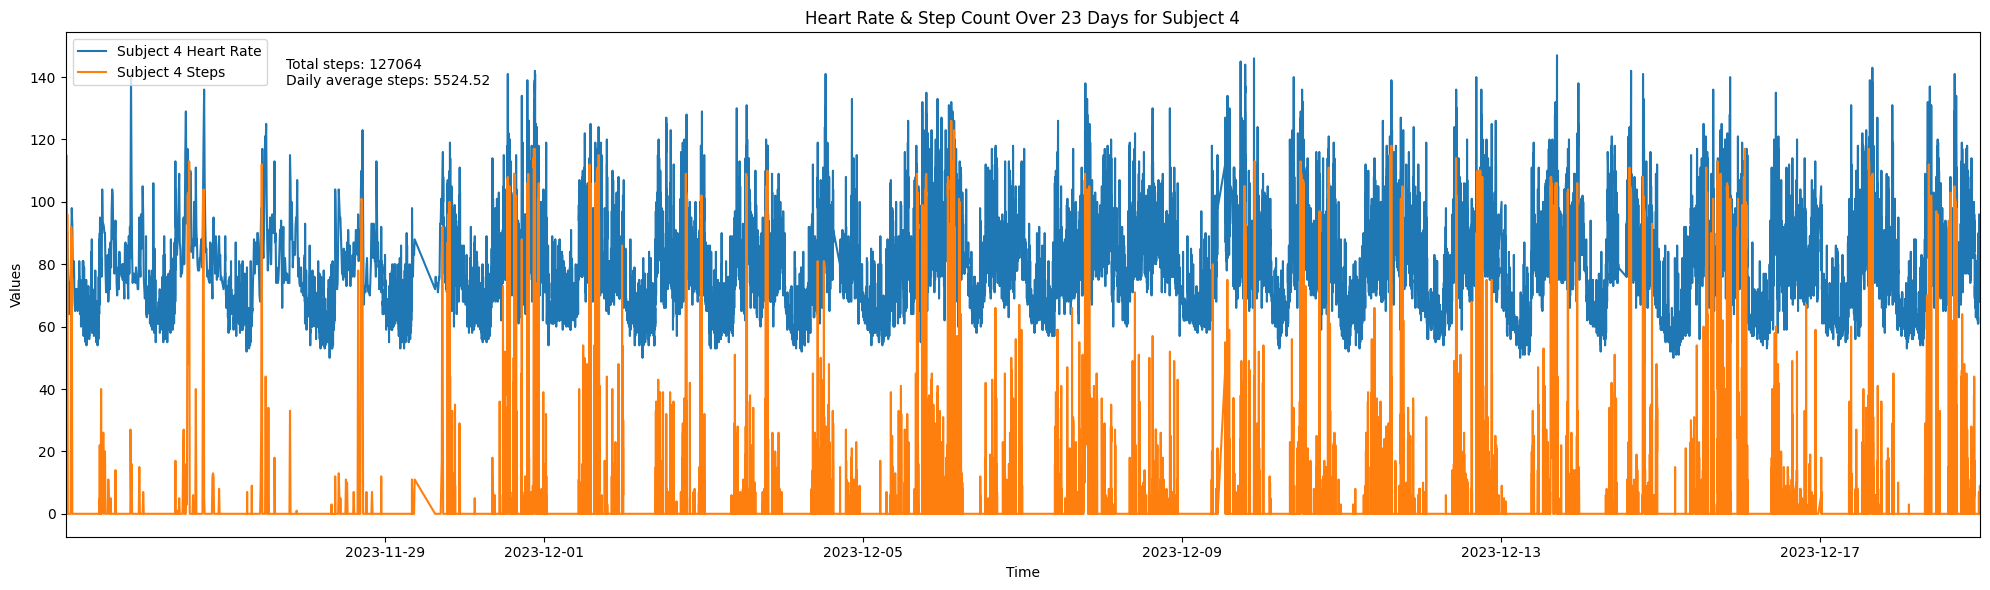

In [ ]:
# Date selection --> Here I don't choose the same dates as with the other two subjects because there were 5 continuous days of missing data.
start_date = pd.to_datetime('2023-11-25')
end_date = pd.to_datetime('2023-12-19')
month4 = df4[(df4['TIMESTAMP'] >= start_date) & (df4['TIMESTAMP'] <= end_date)]
heart_df4 = month4['HEART_RATE'].copy()
steps4 = month4['STEPS'].copy()
total_steps = steps4.sum()
days = month4['TIMESTAMP'].max() - month4['TIMESTAMP'].min()
days = np.int64(days.days)
daily_steps = round(total_steps/days, 2)

# Graph
plt.figure(figsize=(20, 6))
plt.plot(month4['TIMESTAMP'], heart_df4, label='Subject 4 Heart Rate', linestyle='-')
plt.plot(month4['TIMESTAMP'], steps4, label='Subject 4 Steps', linestyle='-')
plt.title(f'Heart Rate & Step Count Over {days} Days for Subject 4')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.text(0.115, 0.95, f"Total steps: {total_steps}\nDaily average steps: {daily_steps}", ha='left', va='top', transform=plt.gca().transAxes)
plt.xlim(month4['TIMESTAMP'].min(), month4['TIMESTAMP'].max())
plt.tight_layout()
plt.show()


## Steps VS Heart Rate Analysis

# Steps vs Heart Rate Analysis

The analysis of steps and heart rate data across all three subjects reveals clear correlations between physical activity and cardiovascular response. As expected, periods of walking consistently trigger increases in heart rate for all subjects, confirming the fundamental physiological relationship between movement and cardiac function.

Particularly noteworthy is the recovery time - the period between when a subject stops walking and when their heart rate returns to baseline. This metric varies significantly between subjects and provides valuable insight into cardiovascular fitness. The data shows distinct recovery patterns that align with each subject's known activity profile.

The visualization of simultaneous steps and heart rate data also reveals interesting patterns in activity timing and intensity. Each subject demonstrates characteristic patterns that reflect their lifestyle. These findings demonstrate how wearable technology can effectively capture the dynamic relationship between movement and cardiovascular response, offering a non-invasive window into physical fitness that could complement traditional clinical assessments.